In [984]:
from mpl_toolkits.mplot3d import axes3d
import sympy
import pandas as pd
from sympy import *
import matplotlib
from sympy.plotting import plot as symplot
from sympy.plotting import plot3d
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import numpy as np
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from sympy.vector import CoordSys3D, divergence, Del, dot

In [985]:
x = symbols('x')
y = symbols('y')
z = symbols('z')
r = symbols('r')
R = symbols('R')

In [986]:
w = (3*(1-r/R)**2)
print('Velocity equation in k direction')
display(w)
print('density equation in terms of r')
rho = 100*(1-0.5*r/R)
display(rho)
print('velocity times density')
expand(w*rho)

Velocity equation in k direction


3*(1 - r/R)**2

density equation in terms of r


100 - 50.0*r/R

velocity times density


300 - 750.0*r/R + 600.0*r**2/R**2 - 150.0*r**3/R**3

In [987]:
mean = (w*r*pi/2)/(1/4*pi*R**2)
print('equation to integrate to get mean velocity')
display(mean)
mean_vel = integrate(mean,(r,0,R))
print('mean velocity:')
display(mean_vel)

equation to integrate to get mean velocity


6.0*r*(1 - r/R)**2/R**2

mean velocity:


0.500000000000000

In [988]:
mass = (rho*w*r*pi/2)
print('funcion a integrar pi/2 * rho * w * r')
display(mass)
mass_flow = integrate(mass,(r,0,R))
print('mass flow:')
display(mass_flow)

funcion a integrar pi/2 * rho * w * r


3*pi*r*(1 - r/R)**2*(100 - 50.0*r/R)/2

mass flow:


10.0*pi*R**2

## Parte de volumenes finitos para estimar mass flow
$ \dot {m} = \frac{\Pi}{2} \int \rho \textbf{v} r dr \therefore m = \frac{\Pi}{2} (\rho \textbf{v}  r) \Delta r $
## Para estimar mean velocity
$ w = 2wr \Delta r$

In [989]:
mean = mean.subs(R,1)

In [990]:
mass = mass.subs(R,1)

In [991]:
dr = 0.01
R = 1
nodos = int(R/dr)

In [992]:
rad = np.linspace(start = 0, stop = 1, num=nodos+1, endpoint=True)

In [993]:
integral_mean = np.zeros(len(rad))
integral_mass = np.zeros(len(rad))
for i in range(len(rad)-1):
    integral_mean[i] = (mean.subs(r,rad[i]) + mean.subs(r,rad[i+1]))/2*dr

In [994]:
print('velocidad promedio')
sum(integral_mean)

velocidad promedio


0.4999500000000001

In [995]:
for i in range(len(rad)-1):
    integral_mass[i] = (mass.subs(r,rad[i]) + mass.subs(r,rad[i+1]))/2*dr

In [996]:
print('flujo másico')
sum(integral_mass)

flujo másico


31.411999623620755

# Problem 2

In [997]:
f = Function('f')(x,y)
fxx = f.diff(x,x)
fy = f.diff(y)
eq = Eq(fxx + fy + f)

display(eq)
c = CoordSys3D('c', transformation='cylindrical', variable_names=("r", "theta", "z"))

Eq(f(x, y) + Derivative(f(x, y), (x, 2)) + Derivative(f(x, y), y), 0)

In [973]:
L = 1
delta = 0.01
dx = delta
dy = delta
w = 1/(dx**2)
e = 1/(dx**2)
n = 1/(2*dy)
s = -1/(2*dy)
alpha = 1-2/(dx**2)
nodos = int(L/delta)
x = np.linspace(start = 0, stop = L, num=nodos, endpoint=True)
Nx = int(len(x))
Ny = int(len(x))

### Central Difference Scheme on dz/dy
$\frac{1}{\Delta x^2} (Zw+Ze) - Zp (1-\frac{2}{\Delta x^2}) + \frac{Zn}{2\Delta y} - \frac{Zs}{2\Delta y} = 0$

## Boundary Conditions:
$Zp - Zw = 0$

$Zp - Zs = 0$ 

$Z(x=0) = 1$

$Z(y=0) = 1$

In [974]:
res = np.zeros((len(x),len(x)))
p = np.zeros(len(x)**2)
m = np.zeros((len(x)**2,len(x)**2))
# dZ/dy = 0
for i in range(0,Nx):
    m[i,i] = 1
    m[i,i+Nx] = -1
    p[i]=0
    #print(i,1,i+Nx)
step = i

# Z = 1 at x = 0
for i in range(step+1,step+Ny-1):
    m[i,(i-step)*(Nx)] = 1
    #print(i,2, (i-step)*(Nx))
    p[i] = 1
step = i

# dZ/dx = 0
for i in range(step+1, step+Ny-1):
    m[i,(i-step-1)*Nx+(Nx*2-1)] = 1
    m[i,(i-step-1)*Nx+(Nx*2-2)] = -1
    p[i] = 0
    #print(i,3,(i-step-1)*Nx+(Nx*2-2))
step = i

# Z = 1 at y= 0
for i in range(step+1, step+1+ Nx):
    m[i,(i-step-1)+Nx*Ny-Ny] = 1
    p[i] = 1
    #print(i,4,(i-step-1)+Nx*Ny-Ny)
step = i

# Inside
for i in range(0, (Nx-2)):
        #m[i,j*]
        for j in range(0,Ny-2):
            step = step+1
            # Zp
            m[step,i*(Nx)+(j+Nx+1)] = alpha
            #ZW
            m[step,i*(Nx)+(j+Nx+1)-1] = w
            #ZE
            m[step,i*(Nx)+(j+Nx+1)+1] = e
            #ZN
            m[step,i*(Nx)+(j+Nx+1)-Nx] = n
            #ZS
            m[step,i*(Nx)+(j+Nx+1)+Nx] = s
            p[step] = 0
            #print(step,5,i*(Nx)+(j+Nx+1)-Nx)

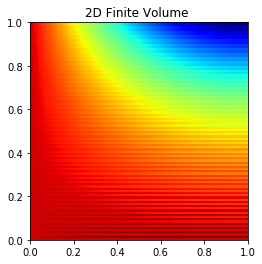

In [977]:
m_inv = np.linalg.inv(m)
Z = p
resultado = np.dot(m_inv,Z)
resultado = resultado.reshape((Nx,Nx))
plt.imshow(resultado, cmap = 'jet', extent=[0,1, 0,1])
plt.title('2D Finite Volume ')
plt.show()

### Forward Difference Scheme on the dz/dy
$\frac{1}{\Delta x^2} (Zw+Ze) - Zp (1-\frac{2}{\Delta x^2}+\frac{1}{\Delta y}) - \frac{Zs}{\Delta y} = 0$

In [1090]:
L = 1
delta = 0.1
dx = delta
dy = delta
w = 1/(dx**2)
e = 1/(dx**2)
n = 1/(dy)
s = -1/(dy)
alpha = 1-2/(dx**2) + 1/dy
nodos = int(L/delta)
x = np.linspace(start = 0, stop = L, num=nodos+1, endpoint=True)
Nx = int(len(x))
Ny = int(len(x))

In [1091]:
res = np.zeros((len(x),len(x)))
p = np.zeros(len(x)**2)
m = np.zeros((len(x)**2,len(x)**2))
# dZ/dy = 0
for i in range(0,Nx):
    m[i,i] = 1
    m[i,i+Nx] = -1
    p[i]=0
    #print(i,1,i+Nx)
step = i

# Z = 1 at x = 0
for i in range(step+1,step+Ny-1):
    m[i,(i-step)*(Nx)] = 1
    #print(i,2, (i-step)*(Nx))
    p[i] = 1
step = i

# dZ/dx = 0
for i in range(step+1, step+Ny-1):
    m[i,(i-step-1)*Nx+(Nx*2-1)] = 1
    m[i,(i-step-1)*Nx+(Nx*2-2)] = -1
    p[i] = 0
    #print(i,3,(i-step-1)*Nx+(Nx*2-2))
step = i

# Z = 1 at y= 0
for i in range(step+1, step+1+ Nx):
    m[i,(i-step-1)+Nx*Ny-Ny] = 1
    p[i] = 1
    #print(i,4,(i-step-1)+Nx*Ny-Ny)
step = i

# Inside
for i in range(0, (Nx-2)):
        #m[i,j*]
        for j in range(0,Ny-2):
            step = step+1
            # Zp
            m[step,i*(Nx)+(j+Nx+1)] = alpha
            #ZW
            m[step,i*(Nx)+(j+Nx+1)-1] = w
            #ZE
            m[step,i*(Nx)+(j+Nx+1)+1] = e
            #ZS
            m[step,i*(Nx)+(j+Nx+1)+Nx] = s
            p[step] = 0
            #print(step,5,i*(Nx)+(j+Nx+1)+Nx)

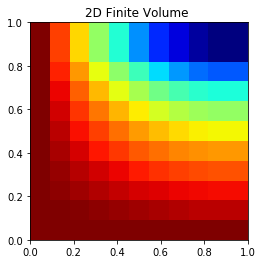

In [1092]:
m_inv = np.linalg.inv(m)
Z = p
resultado = np.dot(m_inv,Z)
resultado = resultado.reshape((Nx,Nx))
plt.imshow(resultado, cmap = 'jet', extent=[0,1, 0,1])
plt.title('2D Finite Volume ')
plt.show()